## Installing libraries

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df= pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Preprocessing

We need to drop the id, because there will be no correlation between id and if someone has a stroke

Then, we also need to label encode married, work_type, residence type and smoking status.

We should also see if theres a correlation between having a stroke and the rest of the features.

For the non-numerical features, we can plot the feature as a bar graph

For numerical features, we can place that into a different data frame and then find the mean

In [ ]:
##there are NaN values in bmi, so we can take the median of bmi values and then replace the NaN values with the median
median_bmi= df.bmi.median()
median_bmi

28.1

In [ ]:
df.bmi= df.bmi.fillna(median_bmi)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
mean_df= df[['age', 'avg_glucose_level','bmi', 'stroke']]
mean_df

,age,avg_glucose_level,bmi,stroke
0,67.0,228.69,36.6,1
1,61.0,202.21,28.1,1
2,80.0,105.92,32.5,1
3,49.0,171.23,34.4,1
4,79.0,174.12,24.0,1
...,...,...,...,...
5105,80.0,83.75,28.1,0
5106,81.0,125.20,40.0,0
5107,35.0,82.99,30.6,0
5108,51.0,166.29,25.6,0


In [ ]:
mean_df.groupby('stroke').mean()

,age,avg_glucose_level,bmi
stroke,,,
0,41.971545,104.795513,28.799115
1,67.728193,132.544739,30.090361


There seems to clear distinction between having a stroke and not having a stroke:
- Age
 - Those who are older (67 years old) are more likley to have a stroke than those who are younger (41 years)
- Average Glucose Level
 - Those who have a higher avg_glucose level are more likely to have a stroke
- BMI
 - Those who have a higher bmi are more likely to get a stroke


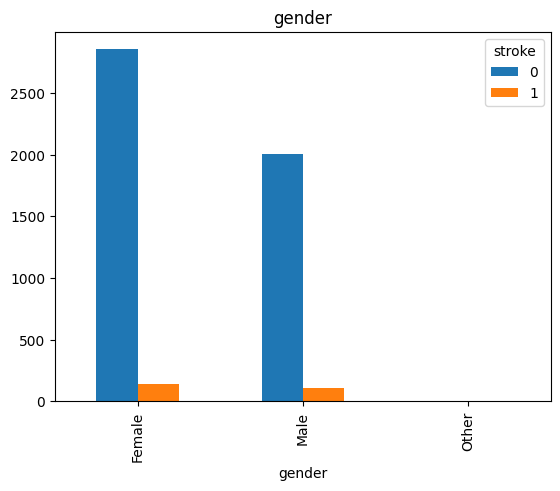

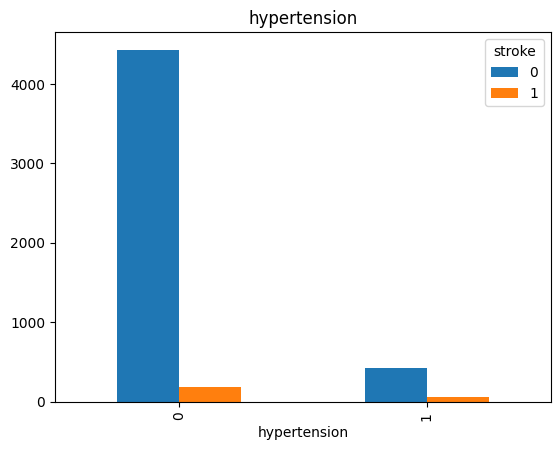

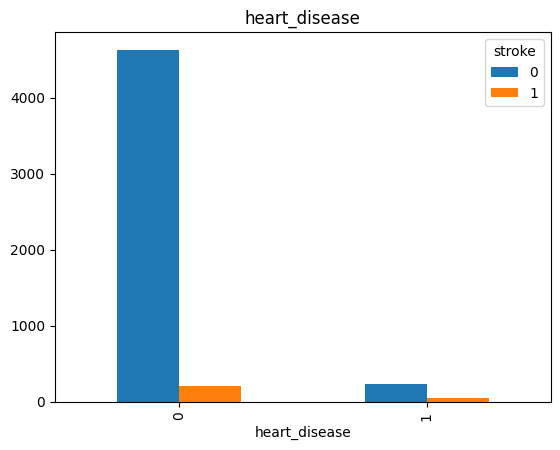

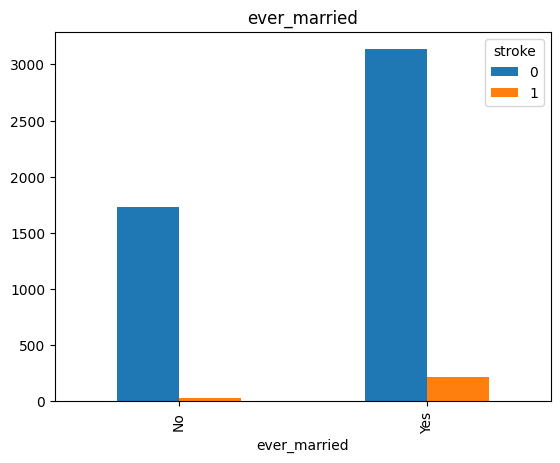

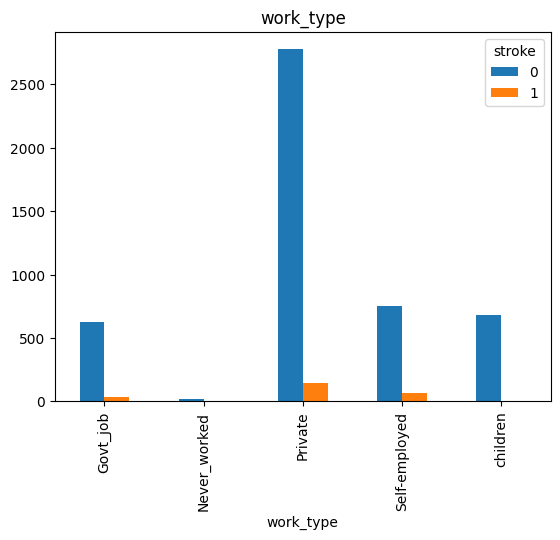

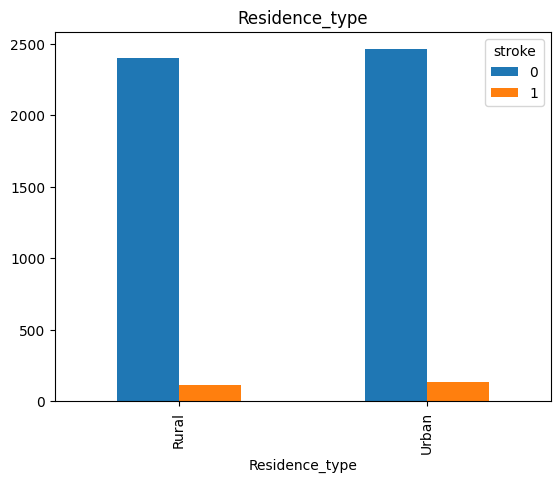

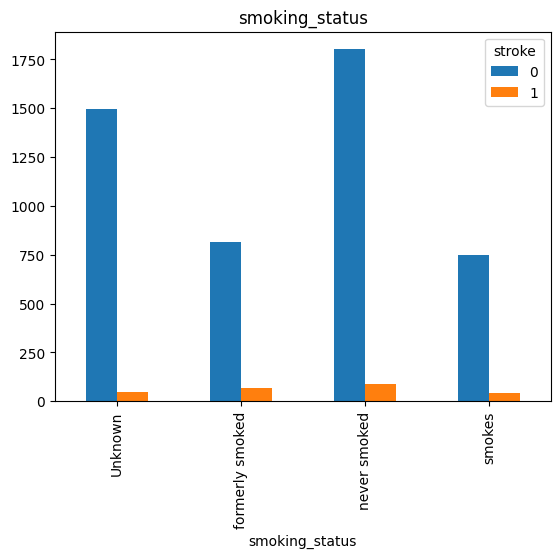

In [ ]:
bar_graph_vis = df[['gender','hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type', 'smoking_status']]
bar_graph_vis

for label in bar_graph_vis.columns:
  pd.crosstab(bar_graph_vis[label], df.stroke).plot(kind='bar')
  plt.title(label)


Factors that seemed to affect smoking_status:
- hypertension
- heart_disease
- work_type
- smoking_status

In [ ]:
df.drop(['id','ever_married','Residence_type'],axis= 'columns', inplace= True)
df

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Private,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Self-employed,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Private,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Private,171.23,34.4,smokes,1
4,Female,79.0,1,0,Self-employed,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Private,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Self-employed,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Self-employed,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Private,166.29,25.6,formerly smoked,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_work_type= LabelEncoder()
le_smoking_status= LabelEncoder()
le_gender= LabelEncoder()

df['work_type_n']= le_work_type.fit_transform(df['work_type'])
df['smoking_status_n']= le_smoking_status.fit_transform(df['smoking_status'])
df['gender_n']= le_gender.fit_transform(df['gender'])

df

,gender,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,work_type_n,le_smoking_status_n,le_gender_n,_gender_n,smoking_status_n,gender_n
0,Male,67.0,0,1,Private,228.69,36.6,formerly smoked,1,2,1,1,1,1,1
1,Female,61.0,0,0,Self-employed,202.21,28.1,never smoked,1,3,2,0,0,2,0
2,Male,80.0,0,1,Private,105.92,32.5,never smoked,1,2,2,1,1,2,1
3,Female,49.0,0,0,Private,171.23,34.4,smokes,1,2,3,0,0,3,0
4,Female,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,3,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Private,83.75,28.1,never smoked,0,2,2,0,0,2,0
5106,Female,81.0,0,0,Self-employed,125.20,40.0,never smoked,0,3,2,0,0,2,0
5107,Female,35.0,0,0,Self-employed,82.99,30.6,never smoked,0,3,2,0,0,2,0
5108,Male,51.0,0,0,Private,166.29,25.6,formerly smoked,0,2,1,1,1,1,1


In [ ]:
df
df= df.drop(['work_type', 'smoking_status','gender'], axis= 'columns')

In [ ]:
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_n,le_smoking_status_n,le_gender_n,_gender_n,smoking_status_n,gender_n
0,67.0,0,1,228.69,36.6,1,2,1,1,1,1,1
1,61.0,0,0,202.21,28.1,1,3,2,0,0,2,0
2,80.0,0,1,105.92,32.5,1,2,2,1,1,2,1
3,49.0,0,0,171.23,34.4,1,2,3,0,0,3,0
4,79.0,1,0,174.12,24.0,1,3,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,0,2,2,0,0,2,0
5106,81.0,0,0,125.20,40.0,0,3,2,0,0,2,0
5107,35.0,0,0,82.99,30.6,0,3,2,0,0,2,0
5108,51.0,0,0,166.29,25.6,0,2,1,1,1,1,1


In [ ]:
inputs= df.drop('stroke', axis= 'columns')

In [ ]:
inputs

,age,hypertension,heart_disease,avg_glucose_level,bmi,work_type_n,le_smoking_status_n,le_gender_n,_gender_n,smoking_status_n,gender_n
0,67.0,0,1,228.69,36.6,2,1,1,1,1,1
1,61.0,0,0,202.21,28.1,3,2,0,0,2,0
2,80.0,0,1,105.92,32.5,2,2,1,1,2,1
3,49.0,0,0,171.23,34.4,2,3,0,0,3,0
4,79.0,1,0,174.12,24.0,3,2,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.1,2,2,0,0,2,0
5106,81.0,0,0,125.20,40.0,3,2,0,0,2,0
5107,35.0,0,0,82.99,30.6,3,2,0,0,2,0
5108,51.0,0,0,166.29,25.6,2,1,1,1,1,1


In [ ]:
target= df.stroke
target

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
5105,0
5106,0
5107,0
5108,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(inputs,target,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [ ]:
model= model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model.score(X_test,y_test)

0.9461839530332681